In [1]:
import ROOT as r

Welcome to JupyROOT 6.24/02


In [15]:
from math import pow, exp

# A function producing two peaks on top of an exponentialy 
# falling background.  Depends on several parameters.
# Generic interface for fcn of n input-values and m parameters
# Functions with this interface may be used to construct a "TFunction" or TF1
# vx is the independent value(s): array like
# p is the parameter value(s): array like

def myfunction(vx, par):
    x=vx[0]  # this is a 1D function
    bkgScale=par[0]
    alpha=par[1]
    beta=par[2]
    background = pow(x/beta,-1.0*alpha)
    A1=par[3]
    mu1=par[4]
    sig1=par[5]
    peak1=A1*exp(-0.5*(x-mu1)*(x-mu1)/sig1/sig1)
    A2=par[6]
    mu2=par[7]
    sig2=par[8]
    peak2=A2*exp(-0.5*(x-mu2)*(x-mu2)/sig2/sig2)
    return bkgScale*background+peak1+peak2

In [24]:
entries=100000
f1 = r.TF1("f1",myfunction,300,1000,9)
f1.SetParameters(1e9,4.7,40,5000,500,2,1200,800,25)
ranHist1 = r.TH1F("ranHist1", "Random Histogram for my PDF;x;entries",500,300,1000);
ranHist1.FillRandom("f1",entries)

Warning in <TROOT::Append>: Replacing existing TH1: ranHist1 (Potential memory leak).


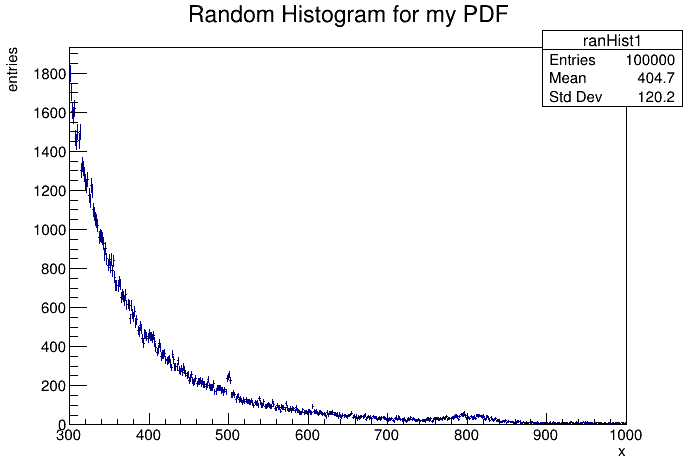

In [25]:
tc=r.TCanvas()
ranHist1.Draw("e")
tc.Draw()

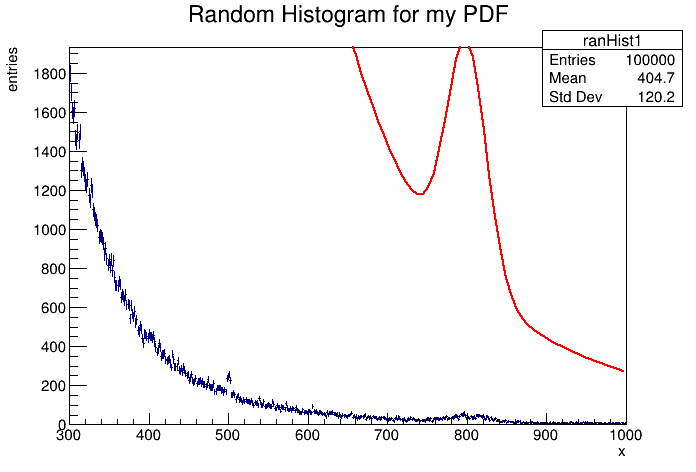

In [26]:
ranHist1.Draw("e")
f1.Draw("same")
tc.Draw()

In [20]:
ranHist1.Fit("f1","S")

 FCN=637.042 FROM HESSE     STATUS=FAILED         17 CALLS         647 TOTAL
                     EDM=3.07173e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.98101e+07   1.27379e+05   7.13709e+01  -3.96011e-10
   2  p1           4.72823e+00   1.34093e-03   1.65387e-05   3.26357e-02
   3  p2           3.58516e+01   2.42613e-02   2.99233e-04  -2.06334e-03
   4  p3          -7.89962e+05   3.00000e+03  -0.00000e+00   0.00000e+00
   5  p4           5.02063e+02   1.41421e+00  -0.00000e+00   0.00000e+00
   6  p5          -2.20508e-03   1.41421e+00  -8.57982e-03   0.00000e+00
   7  p6           2.82891e+01   1.16326e+00  -7.20839e-06   3.11830e-05
   8  p7           8.02314e+02   1.16618e+00  -1.82173e-05   4.75727e-05
   9  p8           2.24820e+01   8.21217e-01   3.06003e-05  -1.69423e-04


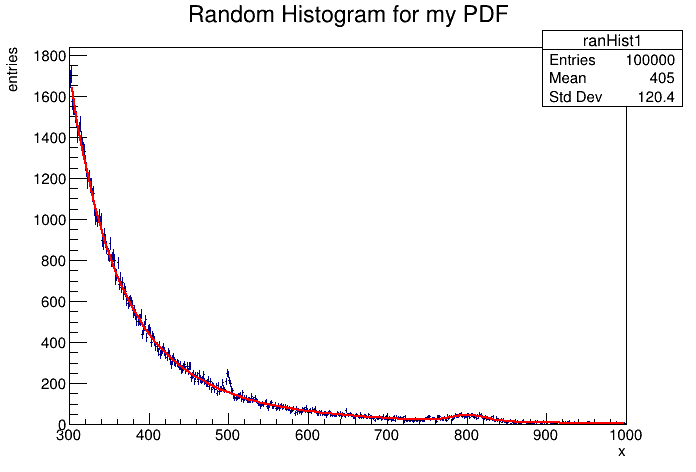

In [21]:
ranHist1.Draw("e")
f1.Draw("same")
tc.Draw()

In [ ]:
#find some other data set to fit